# Loss plots

In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [21]:
class Stats:
    def __init__(self, filename, absolute=True, window=50):
        self.load(filename, absolute)
        
        self.rolling_statistic = {}
        self.rolling_statistic_std = {}
        for key in self.loss_terms:
            s = pd.Series(self.statistic[key]).rolling(window=window)
            self.rolling_statistic[key] = s.mean()
            self.rolling_statistic_std[key] = s.std()
            
            self.rolling_n_sample = pd.Series(self.n_sample).rolling(window=window).mean()
        
    def load(self, filename, absolute=True):
        with open(filename, "r") as f:
            header = f.readline()
        self.loss_terms = [s.strip() for s in header.split(",")][2:]
        
        data = np.loadtxt(filename).T
        self.n_batch = data[0]
        self.n_sample = data[1]
        self.statistic = {k:data[i+2] for i, k in enumerate(self.loss_terms)}
        if absolute:
            self.statistic = {k:np.abs(v) for k,v in self.statistic.items()}
        
    def plot(self, ax, term, pepoch=1568, **kwargs):
        x = self.rolling_n_sample/pepoch
        ax.plot(x, self.statistic[term], **kwargs)
        
    def plot_rolling(self, ax, term, std=False, pepoch=1568, **kwargs):
        x = self.rolling_n_sample/pepoch
        if std:
            ax.fill_between(x, self.rolling_statistic[term] - self.rolling_statistic_std[term],
                               self.rolling_statistic[term] + self.rolling_statistic_std[term],
                               **kwargs)
        else:
            ax.plot(x, self.rolling_statistic[term], **kwargs)
        
        

output_path = "../output"
run_name = "single_scale_max_z2_res4_late_prelu_log_shift_softmax_lr1e-3_slow_decay"

training_stats = Stats(os.path.join(output_path, run_name, "training_stats.txt"), window=100)
validation_stats = Stats(os.path.join(output_path, run_name, "validation_stats.txt"), window=50)

print(training_stats.loss_terms)


['ELBO', 'KL_term', 'log_likelihood_pressure_0', 'lr', 'batch_size']


Text(0.5,0,'pepoch')

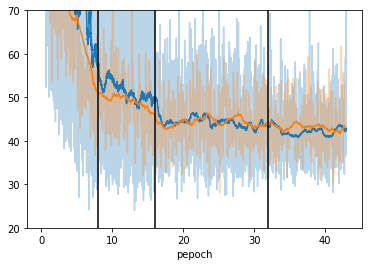

In [22]:
fig, ax = plt.subplots(1, 1)
fig.subplots_adjust(hspace=0)

training_stats.plot(ax, "ELBO", color="C0", alpha=0.3)
validation_stats.plot(ax, "ELBO", color="C1", alpha=0.3)

training_stats.plot_rolling(ax, "ELBO", std=False, color="C0")
validation_stats.plot_rolling(ax, "ELBO", std=False, color="C1")

ax.set_ylim(20, 70)

[ax.axvline(p, c="k") for p in [8, 16, 32]]
[ax.axvline(p, c="k", ls="--") for p in range(96,int(training_stats.rolling_n_sample.max()/1568),64)]

ax.set_xlabel("pepoch")

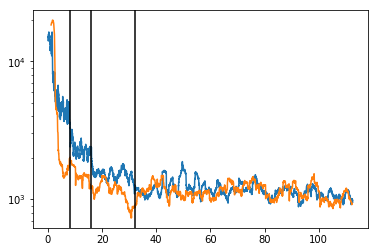

In [111]:
plt.semilogy(training_stats.rolling_n_sample/1568, training_stats.rolling_statistic_std["ELBO"])
plt.semilogy(validation_stats.rolling_n_sample/1568, validation_stats.rolling_statistic_std["ELBO"])

# [plt.axvline(p, c="k") for p in [2,6,14,24,40]]
# [plt.axvline(p, c="k", ls="--") for p in range(80,250,24)]

[plt.axvline(p, c="k") for p in [8, 16, 32]]


In [5]:
import pickle

with open("../output/single_scale_max_z2_log_shift_softmax_lr1e-3_slow_decay/training_sample_indicies.txt", "rb") as f:
    idx = pickle.load(f)

(array([3703., 3766., 3725., 3732., 3787., 3637., 3786., 3827., 3818.,
        3819.]),
 array([1.50000e+01, 3.40870e+04, 6.81590e+04, 1.02231e+05, 1.36303e+05,
        1.70375e+05, 2.04447e+05, 2.38519e+05, 2.72591e+05, 3.06663e+05,
        3.40735e+05]),
 <a list of 10 Patch objects>)

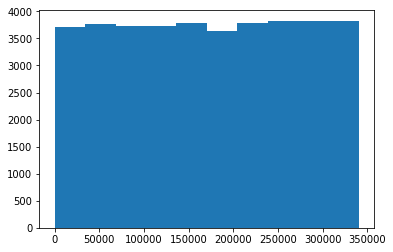

In [6]:
plt.hist(idx)